In [3]:
import latexify
from pnglatex import pnglatex
import sympy

In [5]:
import matplotlib.pyplot as plt
import io
from PIL import Image, ImageChops

white = (255, 255, 255, 255)

def latex_to_img(tex):
    buf = io.BytesIO()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.axis('off')
    plt.text(0.05, 0.5, f'${tex}$', size=40)
    plt.savefig(buf, format='png')
    plt.close()

    im = Image.open(buf)
    bg = Image.new(im.mode, im.size, white)
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    return im.crop(bbox)

latex_to_img(r'\frac{x}{y^2}').save('img.png')

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x0000019271352B90> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [4]:
preview(r'$$\int_0^1 e^x\,dx$$', viewer='file', filename='test.png', euler=False)

NameError: name 'preview' is not defined

In [10]:
from base64 import b64decode
from io import BytesIO
import matplotlib.pyplot as plt
import PIL
from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import (Magics, cell_magic, magics_class)
from IPython.display import display
from IPython.utils.capture import capture_output


@magics_class
class MyMagic(Magics):

    @cell_magic
    @magic_arguments.magic_arguments()
    @magic_arguments.argument(
        "--path",
        "-p",
        default=None,
        help=("The path where the image will be saved to. When there is more then one image, multiple paths have to be defined"),
    )
    @magic_arguments.argument(
        "--compression",
        "-c",
        default=None,
        help=("Defines the amout of compression,  quality can be from 0.1 - 100 , images must be .jpg"),
    )
    def polaroid_camera(self, line, cell):
        args = magic_arguments.parse_argstring(MyMagic.polaroid_camera, line)
        paths = args.path.strip('"').split(' ')
        with capture_output(stdout=False, stderr=False, display=True) as result:
            self.shell.run_cell(cell) # thanks @krassowski for this idea!

        for output in result.outputs:
            display(output)
            data = output.data
            if 'image/png' in data:
                path = paths.pop(0)
                if not path:
                    raise ValueError('Too few paths given!')
                png_bytes = data['image/png']
                if isinstance(png_bytes, str):
                    png_bytes = b64decode(png_bytes)
                assert isinstance(png_bytes, bytes)
                bytes_io = BytesIO(png_bytes)
                img = PIL.Image.open(bytes_io)
                if args.compression:
                    if img.mode != "RGB":
                        img = img.convert("RGB")
                    img.save(path, "JPEG", optimize=True,
                             quality=int(args.compression))
                else:
                    img.save(path, 'png')


ipy = get_ipython()
ipy.register_magics(MyMagic)

In [21]:
@latexify.expression
def function(x,y,z):
    return (3*x + y)/z

In [28]:
print(function)
function

\frac{{3} x + y}{z}


In [ ]:
%%polaroid_camera --path "foo.png bar.png"

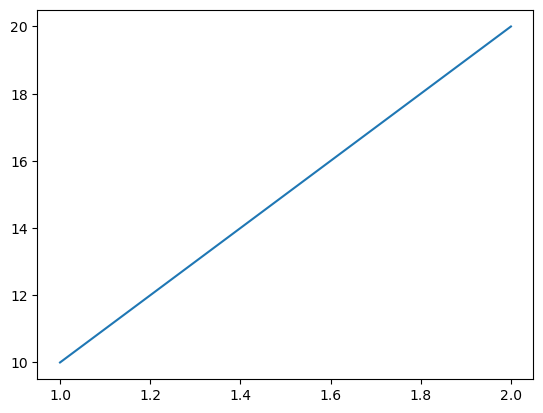

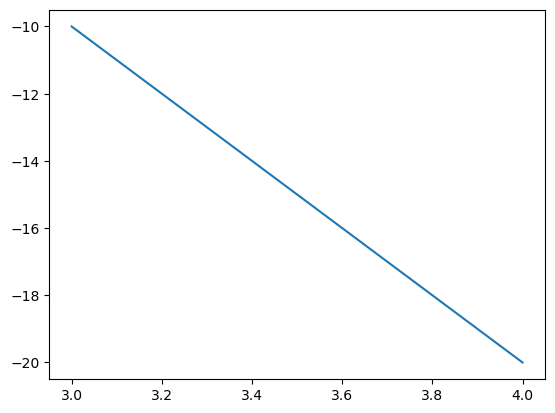

In [7]:
%%polaroid_camera --path "foo.png bar.png"
plt.plot([1,2],[10,20])
plt.show()
plt.plot([3,4],[-10,-20])
plt.show()

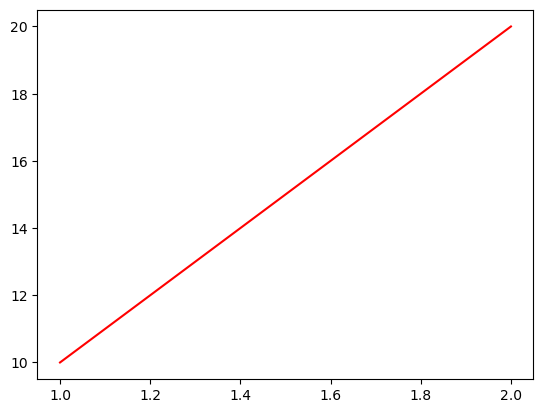

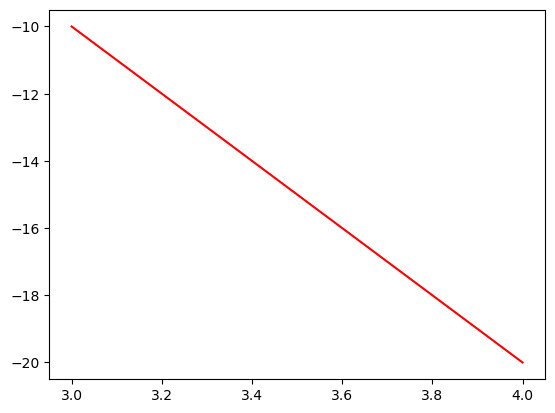

In [8]:
%%polaroid_camera --path "foo.jpg bar.jpg" --compression 50
plt.plot([1,2],[10,20], color = "r")
plt.show()
plt.plot([3,4],[-10,-20],color = "r")
plt.show()

In [4]:
pnglatex(r'\\mathrm{function}(x, y, z) = \\frac{{3} x + y}{z}','output.png')

ValueError: Eexecutable pdflatex not found

In [9]:
def function(x,y,z):
    return (3*x + y)/z

%%polaroid_camera --path "eq.png"
latexify.get_latex(function)

UsageError: Line magic function `%%polaroid_camera` not found.


In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
with tf.Session() as sess:
    sess.run(init_op)
    # Do some work with the model.
    inc_v1.op.run()
    dec_v2.op.run()
    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)

    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, "/tmp/model.ckpt")
        print("Model restored.")

In [ ]:
import glob
import numpy as np
image_path = glob.glob(dataset_folder + '/*.png')
im_array = np.array([np.reshape(np.array(Image.open(img).convert('L'), 'f'), (image_size)) for
img in image_path])
y_from_file = pickle.load(open(lable_data_file, "rb"))

In [24]:

for d,p,f in os.walk(r"..\data"):
    print(f)

allfiles = [os.path.join(root,f) for root,dirs,files in os.walk("..\data") for f in files]
for f in allfiles:
        print(f)

['Emc2.png', 'Eq1.png', 'Eq2.png', 'Eq3.png', 'Eq4.png', 'Eq5.png', 'Fourier.png', 'PaperEquation.png', 'Template_E.png']
..\data\Emc2.png
..\data\Eq1.png
..\data\Eq2.png
..\data\Eq3.png
..\data\Eq4.png
..\data\Eq5.png
..\data\Fourier.png
..\data\PaperEquation.png
..\data\Template_E.png


In [5]:
"""
Tentando utilizar busca por contornos
"""
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact

allfiles = [os.path.join(root,f) for root,dirs,files in os.walk("..\data") for f in files]

def contornos(x=5,y=5):
    #  Le imagem do arquivo
    img_rgb = cv2.imread(r"..\data\Emc2.png", cv2.IMREAD_COLOR)
    img_rgb = cv2.resize(img_rgb,(600,400),cv2.INTER_AREA)

    # Transforma em escala de cinza
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    # Performing OTSU threshold
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Specify structure shape and kernel size.
    # Kernel size increases or decreases the area
    # of the rectangle to be detected.
    # A smaller value like (10, 10) will detect
    # each word instead of a sentence.
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (x, y))

    # Applying dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

    # Finding contours
    contours, hierarchy = cv2.findContours(
        dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
    )

    # Creating a copy of image
    im2 = gray.copy()

    # Looping through the identified contours
    # Then rectangular part is cropped and passed on
    # to pytesseract for extracting text from it
    # Extracted text is then written into the text file
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Drawing a rectangle on copied image
        rect = cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Cropping the text block for giving input to OCR
        cropped = gray[y : y + h, x : x + w]

    plt.imshow(cropped,"gray")
    plt.show()
    plt.imshow(rect,"gray")
    plt.show()


interact(contornos, x=(1, 200), y=(1, 200))


interactive(children=(IntSlider(value=5, description='x', max=200, min=1), IntSlider(value=5, description='y',…

<function __main__.contornos(x=5, y=5)>

109


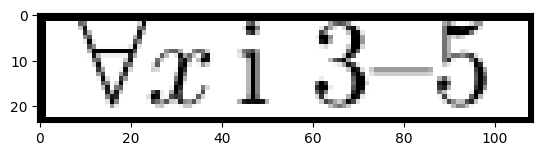

37


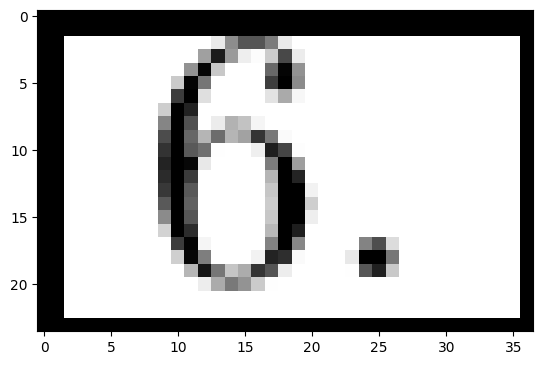

108


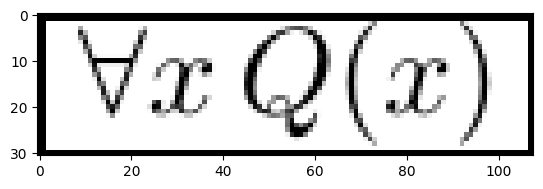

37


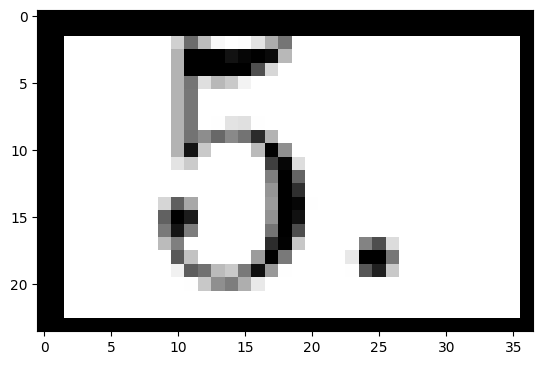

37


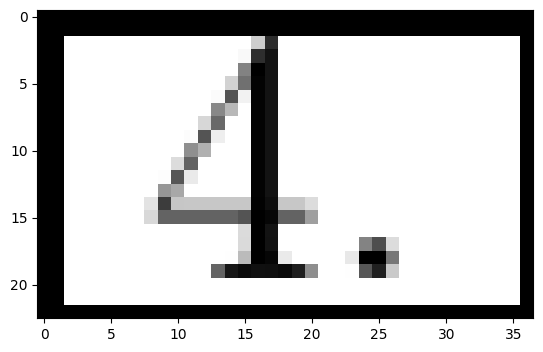

37


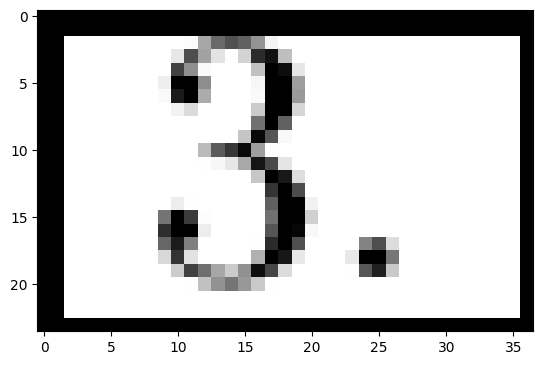

451


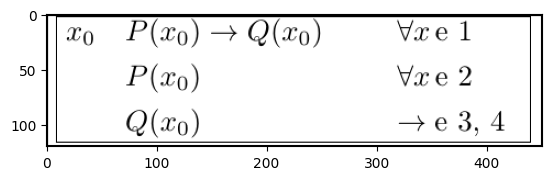

107


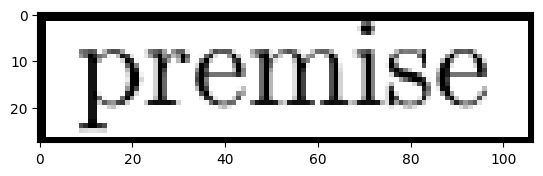

37


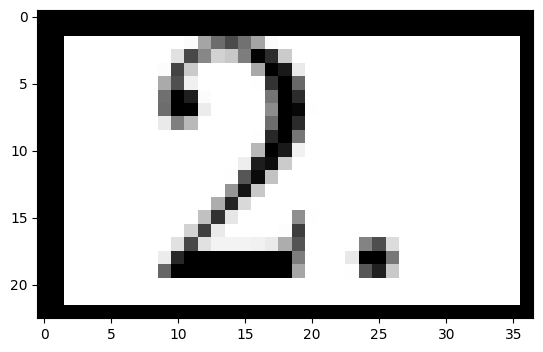

108


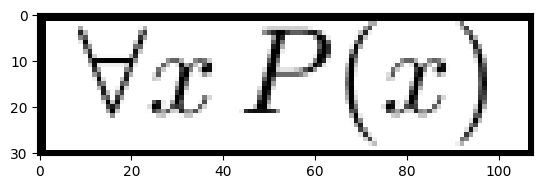

107


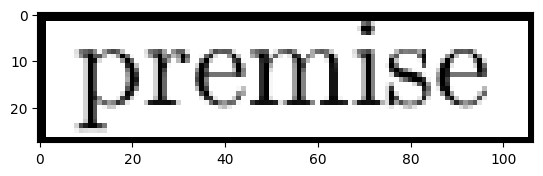

36


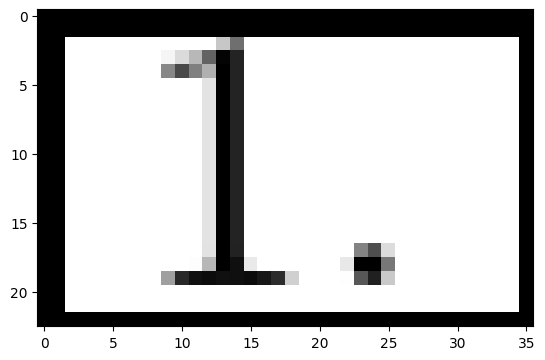

228


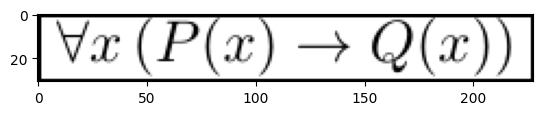

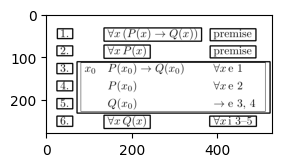

In [28]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact


# Find potential outliers in values array
# and visualize them on a plot

def is_outlier(value, p25, p75):
    """Check if value is an outlier
    """
    lower = p25 - 1.5 * (p75 - p25)
    upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper
 
 
def get_indices_of_outliers(values):
    """Get outlier indices (if any)
    """
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
     
    indices_of_outliers = []
    for ind, value in enumerate(values):
        if is_outlier(value, p25, p75):
            indices_of_outliers.append(ind)
    return indices_of_outliers


def findcontours(img:np.array):
    contours, hierarchy = cv2.findContours(
    img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return contours, hierarchy

#  Le imagem do arquivo
img_rgb = cv2.imread(r"..\data\PredicateLogic.png", cv2.IMREAD_COLOR)

# Transforma em escala de cinza
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,6))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

# Finding contours
contours, hierarchy = findcontours(dilation)

# Creating a copy of image
im2 = gray.copy()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Cropping the text block for giving input to OCR
    cropped = gray[y : y + h, x : x + w]
    print(w)
    plt.imshow(cropped,"gray")
    plt.show()
plt.subplot(121)
plt.imshow(gray, "gray")
plt.show()